In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from pykrige.ok import OrdinaryKriging

# Load Data

In [2]:
data_dir = "../data/Jan1524_Jan2224/"
data_files = [file for file in os.listdir(data_dir) if file.endswith(".csv")]
data = []
for file in data_files:
    df = pd.read_csv(data_dir + file)
    data.append(df.loc[420, ['pm25', 'longitude', 'latitude']].to_numpy())
data = np.array(data)
X, Y = data[:, 1:].astype(np.float64), data[:, 0].astype(np.float64)
print(X.shape, Y.shape)

(8, 2) (8,)


# Interpolation

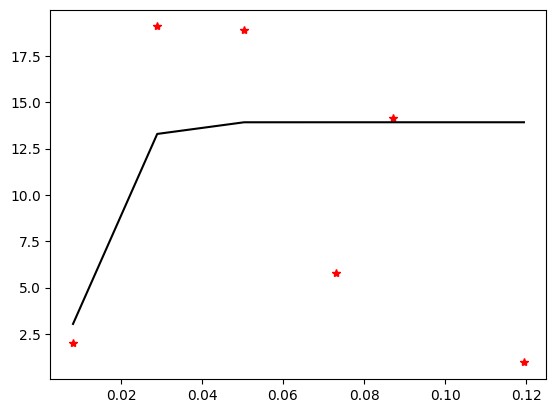

In [32]:
OK_model = OrdinaryKriging(X[:, 0], X[:, 1], Y,
                           variogram_model='gaussian',
                           enable_plotting=True)

In [6]:
# create a mesh
merced_boundary = [-120.55, 37.38, -120.39, 37.21]
x_min, x_max = merced_boundary[0], merced_boundary[2]
y_min, y_max = merced_boundary[3], merced_boundary[1]
h = 0.005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_test = np.c_[xx.ravel(), yy.ravel()]
print(X_test.shape)

(1120, 2)


In [9]:
z, ss = OK_model.execute('points', X_test[:, 0], X_test[:, 1])
print(z.shape, ss.shape)

(1120,) (1120,)


In [23]:
z = z.reshape(xx.shape)
ss = ss.reshape(xx.shape)

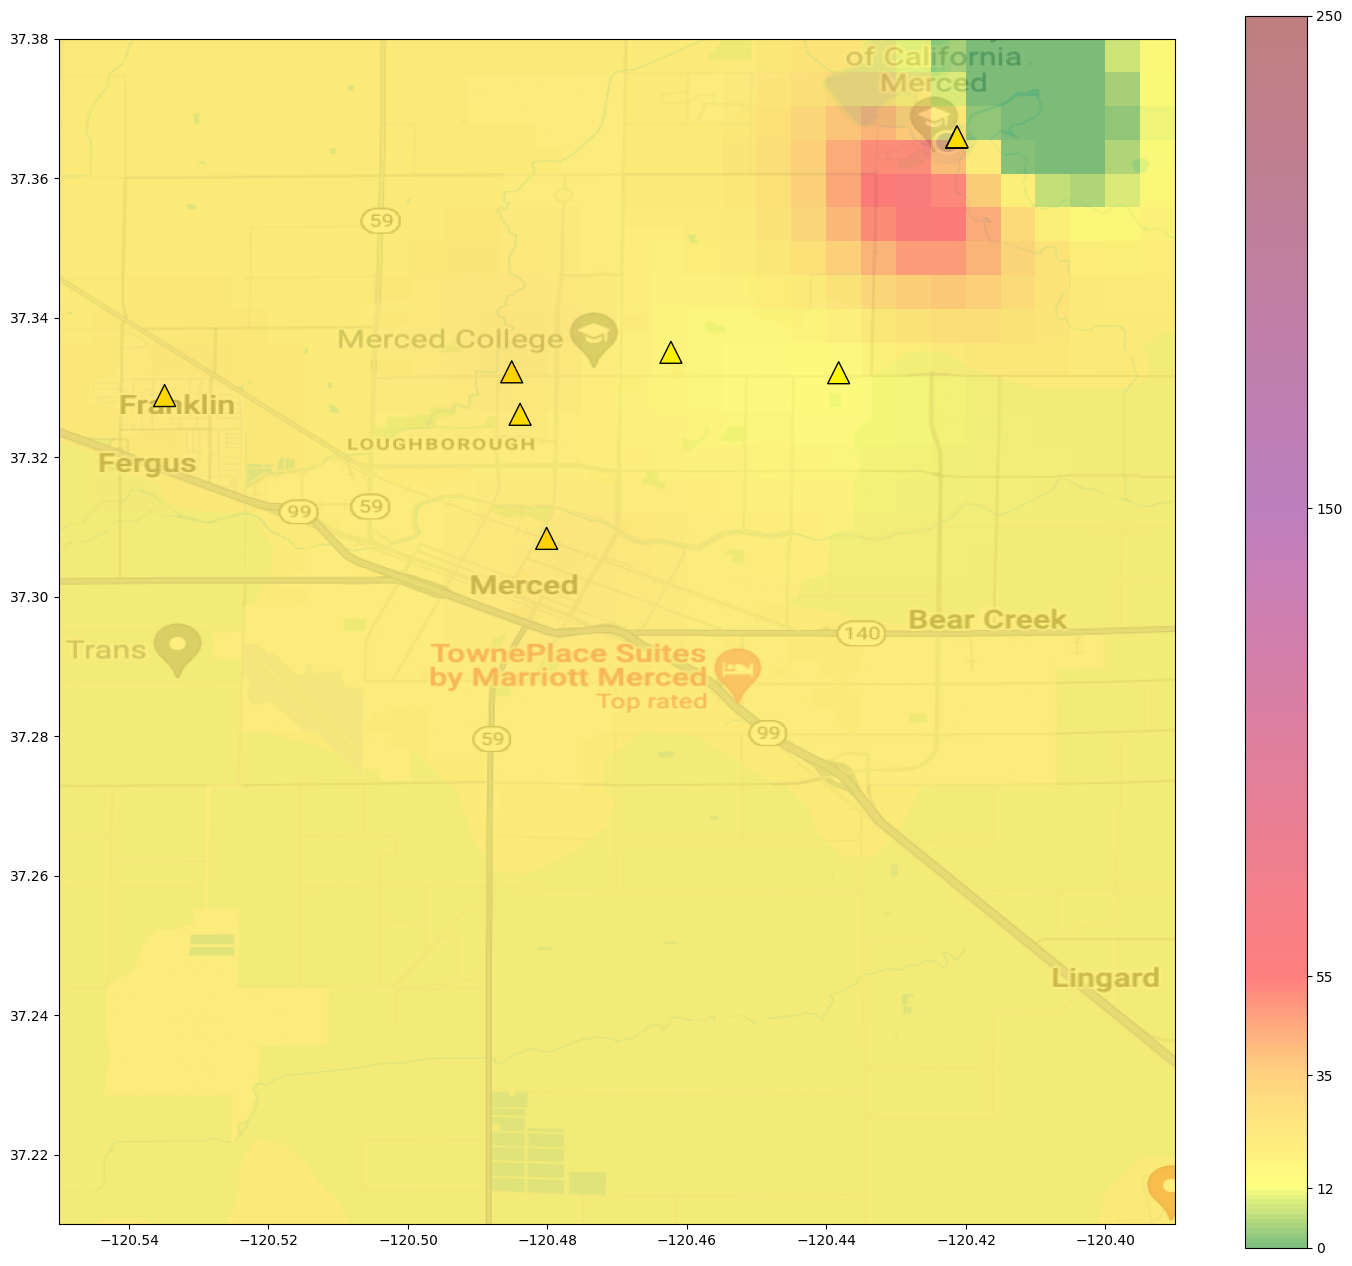

In [25]:
color_list = [(0, "green"), (12 / 250, "yellow"), (35 / 250, "orange"), (55 / 250, "red"), (150 / 250, "purple"), (1, "maroon")]
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", color_list)

merced_map = plt.imread("./Merced_Map.png")

fig, ax = plt.subplots(figsize=(18, 16))
ax.grid(False)
extent = merced_boundary[0], merced_boundary[2], merced_boundary[3], merced_boundary[1]
plt.imshow(merced_map, alpha=0.5, extent=extent)
sc = plt.imshow(z, origin="lower", cmap=custom_cmap, vmin=0, vmax=250, alpha=0.5, extent=extent)
ax.scatter(X[:, 0], X[:, 1],
           c=Y, cmap=custom_cmap,
           marker="^", s=250, edgecolors="black",
           vmin=0, vmax=250, alpha=1)
plt.colorbar(sc, ticks=[0, 12, 35, 55, 150, 250])
plt.show()

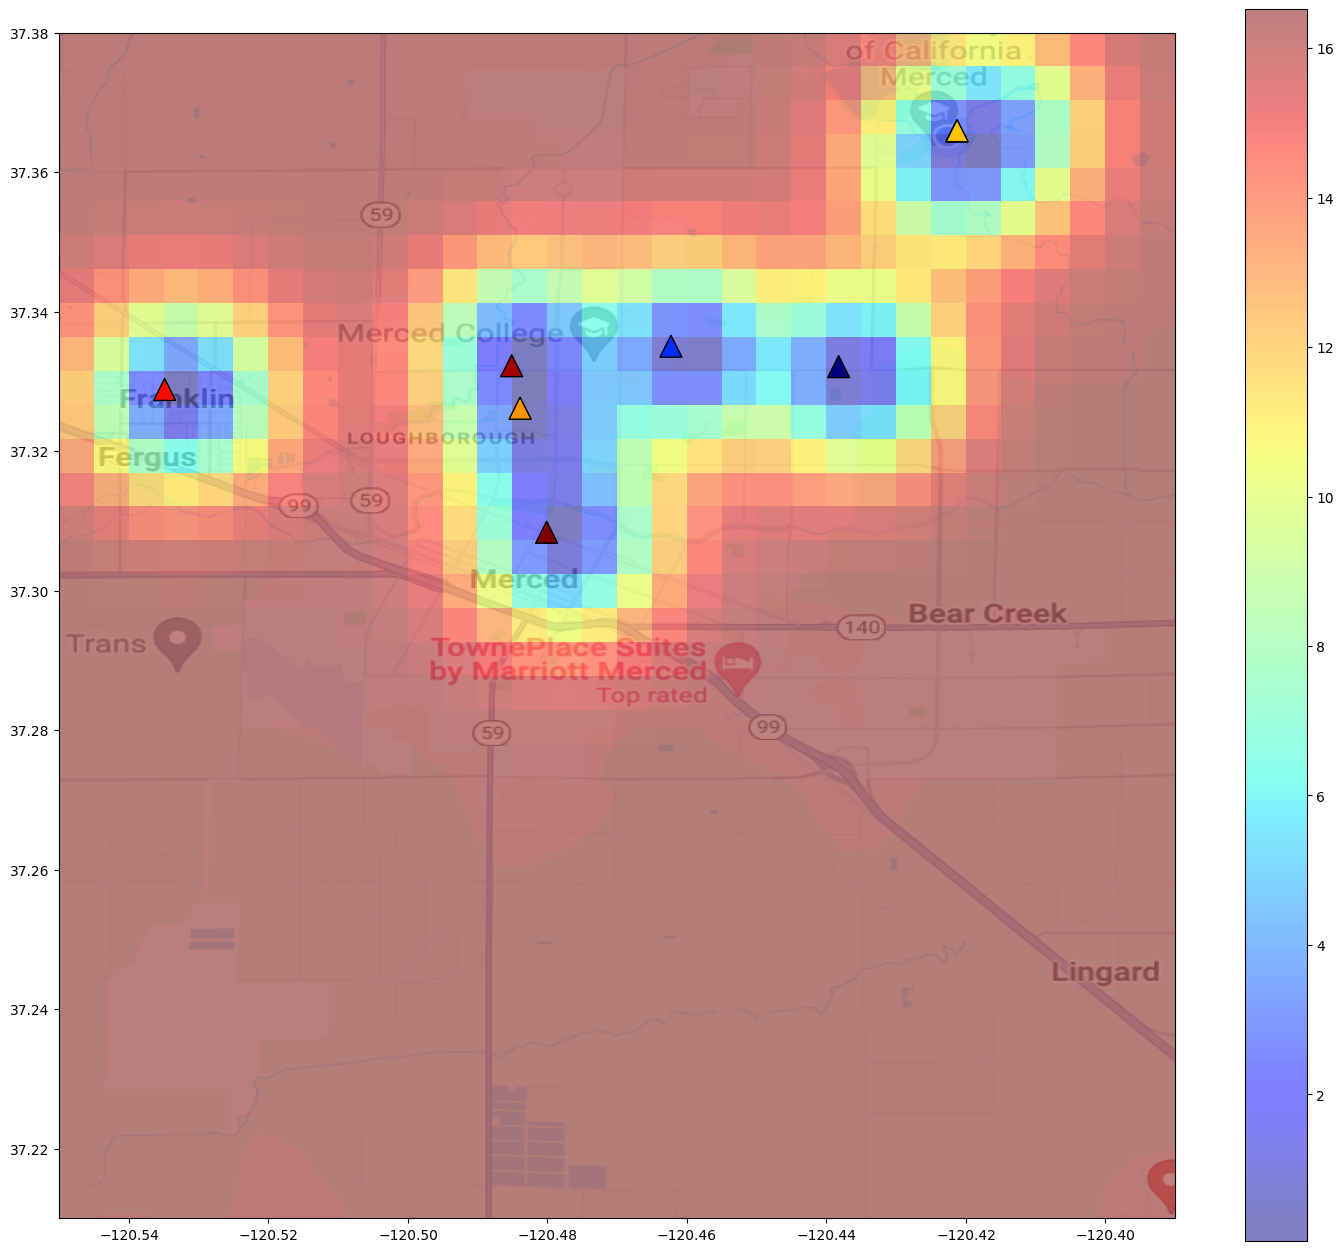

In [30]:
merced_map = plt.imread("./Merced_Map.png")

fig, ax = plt.subplots(figsize=(18, 16))
ax.grid(False)
extent = merced_boundary[0], merced_boundary[2], merced_boundary[3], merced_boundary[1]
plt.imshow(merced_map, alpha=0.5, extent=extent)
sc = plt.imshow(ss, origin="lower", cmap="jet", alpha=0.5, extent=extent)
ax.scatter(X[:, 0], X[:, 1],
           c=Y, cmap="jet",
           marker="^", s=250, edgecolors="black",
           alpha=1)
plt.colorbar()
plt.show()